In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")

C:\Users\isabe\AppData\Local\Temp\ipykernel_25200\2192911794.py:3: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")


In [2]:
df.columns

Index(['id', 'chords', 'release_date', 'genres', 'decade', 'rock_genre',
       'artist_id', 'main_genre', 'spotify_song_id', 'spotify_artist_id'],
      dtype='object')

In [3]:
# convert release_date to datetime and keep only rows after 2015-01-01
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)
cutoff = pd.Timestamp('2015-01-01')
df = df[df['release_date'] > cutoff].reset_index(drop=True)

# quick sanity check
print(f'Rows after {cutoff.date()}:', len(df))
print('Date range:', df['release_date'].min(), 'to', df['release_date'].max())

C:\Users\isabe\AppData\Local\Temp\ipykernel_25200\3158674205.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)


Rows after 2015-01-01: 180411
Date range: 2015-01-02 00:00:00 to 2023-11-18 00:00:00


In [4]:
rnb_df = df[df['genres'].str.contains('r&b', case=False, na=False)]


In [5]:
rnb_df.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
42,76,<intro_1> Ebmaj7 F Bbmaj7 Gmin7 <verse_1> Ebma...,2023-04-07,'canadian contemporary r&b',2020.0,NaN,artist_59,soul,3ym8ajVmKm6Fybgov3WBI5,20wkVLutqVOYrc0kxFs7rA
50,92,<verse_1> Amin C E E7 Amin C E E7 Amin C E E7 ...,2022-10-14,'dark r&b',2020.0,NaN,artist_75,soul,62rXTgGmOsUBiIr10BHlTw,3AYZMgvmzNKc3cGmJUSITh
128,209,<intro_1> Fmin Bbmin Eb <verse_1> Fmin Bbmin E...,2022-10-21,'bedroom r&b',2020.0,NaN,artist_126,soul,3eVoB50kvcFMkQ5Gs4naQc,1pmY5q8eybXnnrwOEFqQ1M
162,285,<verse_1> C Dmin Amin Cmaj7 C Amin A Amin7 Fma...,2015-06-09,'canadian pop' 'contemporary r&b' 'hip pop' 'r...,2010.0,NaN,artist_172,pop,1C18fJEsSR0hpRxMzRQCrA,0le01dl1WllSHhjEXRl4in
174,322,<verse_1> C Amin C Amin Dmin7 F G <chorus_1> C...,2023-02-10,'r&b',2020.0,NaN,artist_195,soul,0OdRKPM36edHZ8OEpbrDCu,30DhU7BDmF4PH0JVhu8ZRg


In [6]:
rnb_df_first_ten = rnb_df.head(500)

In [7]:
rnb_df_first_ten

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
42,76,<intro_1> Ebmaj7 F Bbmaj7 Gmin7 <verse_1> Ebma...,2023-04-07,'canadian contemporary r&b',2020.0,NaN,artist_59,soul,3ym8ajVmKm6Fybgov3WBI5,20wkVLutqVOYrc0kxFs7rA
50,92,<verse_1> Amin C E E7 Amin C E E7 Amin C E E7 ...,2022-10-14,'dark r&b',2020.0,NaN,artist_75,soul,62rXTgGmOsUBiIr10BHlTw,3AYZMgvmzNKc3cGmJUSITh
128,209,<intro_1> Fmin Bbmin Eb <verse_1> Fmin Bbmin E...,2022-10-21,'bedroom r&b',2020.0,NaN,artist_126,soul,3eVoB50kvcFMkQ5Gs4naQc,1pmY5q8eybXnnrwOEFqQ1M
162,285,<verse_1> C Dmin Amin Cmaj7 C Amin A Amin7 Fma...,2015-06-09,'canadian pop' 'contemporary r&b' 'hip pop' 'r...,2010.0,NaN,artist_172,pop,1C18fJEsSR0hpRxMzRQCrA,0le01dl1WllSHhjEXRl4in
174,322,<verse_1> C Amin C Amin Dmin7 F G <chorus_1> C...,2023-02-10,'r&b',2020.0,NaN,artist_195,soul,0OdRKPM36edHZ8OEpbrDCu,30DhU7BDmF4PH0JVhu8ZRg
...,...,...,...,...,...,...,...,...,...,...
35896,76919,<intro_1> G Emin D C Cmin G <verse_1> Emin D C...,2022-01-20,'chill r&b',2020.0,NaN,artist_7239,soul,0LkWbtH4CUZShIkpGY7zZQ,7zrkFhYAp6dBxsydmJkouN
36020,77205,<verse_1> Emin Amin B7 Emin C Amin B7 Emin Ami...,2021-10-29,'french hip hop' 'pop urbaine' 'r&b francais',2020.0,NaN,artist_28760,rap,0Kr8yRrpi7hLfUQQsmxt73,05hirnMeVIzCrcUxbrysZU
36066,77291,<verse_1> Cmaj7 Gmin7 C7 Fmaj7 Fmin As Cmaj7 G...,2018-06-01,'bedroom r&b' 'canadian contemporary r&b' 'chi...,2010.0,NaN,artist_17566,soul,2AdPUoQQcHkQ1v8kEoMZKi,33crDRqANd3NQHJagZkQ7O
36121,77411,<intro_1> F C E7 Amin7 F C E7 Amin7 <verse_1> ...,2021-04-29,'bedroom r&b' 'chinese r&b',2020.0,NaN,artist_28821,soul,6riw7EvS6amwDkv7RXsQAG,4EKSBwzbRW2YnMP5JXnXYr


In [8]:
import pickle, music21, re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [29]:
import re

# Function to normalize chords to music21 format
def normalize_music21_chord(ch):
    if not ch:
        return None

    # Normalize flats and sharps
    ch = ch.replace('b', '-')   # b → - for flats
    ch = ch.replace('#', '#')   # keep sharps
    ch = ch.replace('min7', 'm7')  # minor 7
    ch = ch.replace('min', 'm')    # minor
    ch = ch.replace('M7', 'maj7')  # major 7
    ch = ch.replace('dim6', 'dim') # dim6 → dim
    ch = ch.replace('aug', 'aug')  # keep aug
    ch = ch.replace('sus', 'sus')  # keep sus

    # Fix Bbm, Ebm etc. → B-m, E-m
    ch = re.sub(r'^([A-G])-?m$', r'\1-m', ch)

    # Fix slash chords: ensure root and bass are uppercase
    if '/' in ch:
        parts = ch.split('/')
        root = parts[0].capitalize()
        bass = parts[1].capitalize()
        ch = f'{root}/{bass}'

    # Capitalize root letter for any chord
    m = re.match(r'^([A-Ga-g])([-#]?)(.*)$', ch)
    if m:
        root, accidental, rest = m.groups()
        ch = root.upper() + accidental + rest

    return ch

# Normalize all sequences
first_ten_sequence_normalized = []

# Make sure each entry in rnb_df_first_ten['chords'] is a list of chords
for row in rnb_df['chords']:
    if not row:  # skip empty
        first_ten_sequence_normalized.append([])
        continue

    # If the row is a string, split into individual chords (adjust regex if needed)
    if isinstance(row, str):
        # Split based on uppercase letters followed by optional accidentals and chord types
        chords = re.findall(r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?', row)
    else:
        chords = row  # already a list

    # Normalize each chord
    new_song = [normalize_music21_chord(ch) for ch in chords if ch]
    first_ten_sequence_normalized.append(new_song)

# Example: get states
states = set()
for song in first_ten_sequence_normalized:
    states |= set(song)
states = list(states)

print('Normalized first sequence example:', first_ten_sequence_normalized[0])
print('States:', states)


Normalized first sequence example: ['E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'C-m', 'F', 'G-m', 'E-m']
States: ['Dsus4', 'E/D', 'F/E', 'A/G', 'F13', 'C/G', 'Gmaj7/D', 'E9', 'B13', 'E/F', 'Dsus2/A', 'A/A', 'C', 'Fdim7', 'Dsus2/C', 'Eaug', 'Edim', 'B/C', 'C13/C', 'B/A', 'F-m', 'Bsus4', 'Fmaj7/C', 'C13', 'Dmaj7/F', 'G13', 'F', 'A', 'Cdim', 'G/C', 'G/D', 'G9', 'F/C', 'Edim7/A', 'D9', 'Asus4/C', 'Cmaj7/A', 'Dsus2/F', 'Asus4/B', 'Cdim7', 'E13', 'Fsus4', 'C-m', 'E/G', 'C13/A', 'G', 'A/F', 'Fsus2/D', 'G-m', 'Emaj7/A', 'C/A', 'Caug', 'Gdim7', 'Fsus4/D', 'G7/D', 'A/B', 'Bsus2', 'B9', 'Faug', 'D/F', 'Ddim7/F', 'B', 'E/B', 'B/F', 'A13/A', 'F/A', 'Fmaj7/D', 'G/B', 'Gsus4/D', 'Ddim'

In [31]:
stream = music21.stream.Stream()
for chord_symbol in states:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(5.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  



In [32]:
import music21
import re

# get the 6th row (row number 5, 0-based)
chord_sequence = rnb_df.iloc[3]['chords']

# if it's a string of chords, split it properly
if isinstance(chord_sequence, str):
    chord_sequence = re.findall(
        r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?',
        chord_sequence
    )

# normalize using your function
chord_sequence = [normalize_music21_chord(ch) for ch in chord_sequence if ch]

# make the stream
stream = music21.stream.Stream()
for chord_symbol in chord_sequence:
    try:
        chord = music21.harmony.ChordSymbol(chord_symbol)
        chord.duration = music21.duration.Duration(2.0)
        stream.append(chord)
    except Exception as e:
        print(f"Skipping {chord_symbol}: {e}")

# write and play
stream.write('midi', fp='music.mid')
stream.show('midi')


In [33]:
first_ten_songs = rnb_df["chords"]

In [34]:
S = len(states)
state2idx = {s: i for i, s in enumerate(states)}
tr_counts = np.zeros((S, S), dtype=float)  # rows = from, cols = to (we'll choose rows-from)

for song in first_ten_songs:
    # make sure song is iterable of chords
    if not song or len(song) < 2:
        continue

    # if song is a string, split into chord tokens and normalize
    if isinstance(song, str):
        chords = re.findall(r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?', song)
        chords = [normalize_music21_chord(ch) for ch in chords if ch]
    else:
        chords = song

    # count transitions, skipping chords not in our state index to avoid KeyError
    for t in range(1, len(chords)):
        frm = chords[t - 1]
        to = chords[t]
        if frm not in state2idx or to not in state2idx:
            # skip unknown or malformed tokens (e.g., stray 'm')
            continue
        i = state2idx[frm]
        j = state2idx[to]
        tr_counts[i, j] += 1  # row = from, col = to (intuitive)

# Build DataFrame for readable inspection
print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print('State proportions: \n', sums)

State proportions: 
 [[1.9100e+02]
 [2.0000e+00]
 [1.6000e+01]
 [1.1000e+01]
 [3.2000e+01]
 [1.1900e+02]
 [3.0000e+01]
 [6.2000e+01]
 [7.4000e+01]
 [4.0000e+01]
 [1.1000e+01]
 [4.0000e+00]
 [2.9644e+04]
 [4.4000e+01]
 [2.0000e+00]
 [2.9000e+01]
 [4.1000e+01]
 [8.6000e+01]
 [2.2000e+01]
 [2.8000e+01]
 [5.1450e+03]
 [3.6000e+01]
 [9.0000e+00]
 [1.5000e+01]
 [1.7000e+01]
 [1.5800e+02]
 [2.6346e+04]
 [1.9198e+04]
 [3.8000e+01]
 [8.0000e+00]
 [6.1000e+01]
 [2.7000e+01]
 [7.1000e+01]
 [2.0000e+00]
 [1.2500e+02]
 [2.6000e+01]
 [1.1000e+01]
 [5.0000e+00]
 [1.0000e+00]
 [1.1000e+02]
 [1.0000e+01]
 [5.8000e+01]
 [5.9170e+03]
 [1.1100e+02]
 [2.0000e+00]
 [2.9553e+04]
 [8.3000e+01]
 [1.0000e+00]
 [8.1160e+03]
 [2.8000e+01]
 [2.0000e+01]
 [1.5000e+01]
 [1.4700e+02]
 [2.0000e+00]
 [0.0000e+00]
 [8.7000e+01]
 [1.6500e+02]
 [7.5000e+01]
 [1.7000e+01]
 [4.4300e+02]
 [1.0000e+00]
 [1.6559e+04]
 [1.1000e+01]
 [6.0000e+00]
 [5.0000e+00]
 [9.1000e+01]
 [2.0000e+00]
 [3.1800e+02]
 [1.0000e+00]
 [5.4000e+01]

In [36]:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)
print('Transition Proportions:\n', tr_pr)

Transition Proportions:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

         Dsus4  E/D  F/E  A/G  F13  C/G  Gmaj7/D   E9  B13  E/F  ...  Gsus2  \
Dsus4      0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
E/D        0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
F/E        0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
A/G        0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
F13        0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
...        ...  ...  ...  ...  ...  ...      ...  ...  ...  ...  ...    ...   
D/G        0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
D          0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
Asus4/F    0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
D7/A       0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   
A13        0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  ...    0.0   

         D7/C  A7/E   C7     E  D/G     D  Asus4/F 

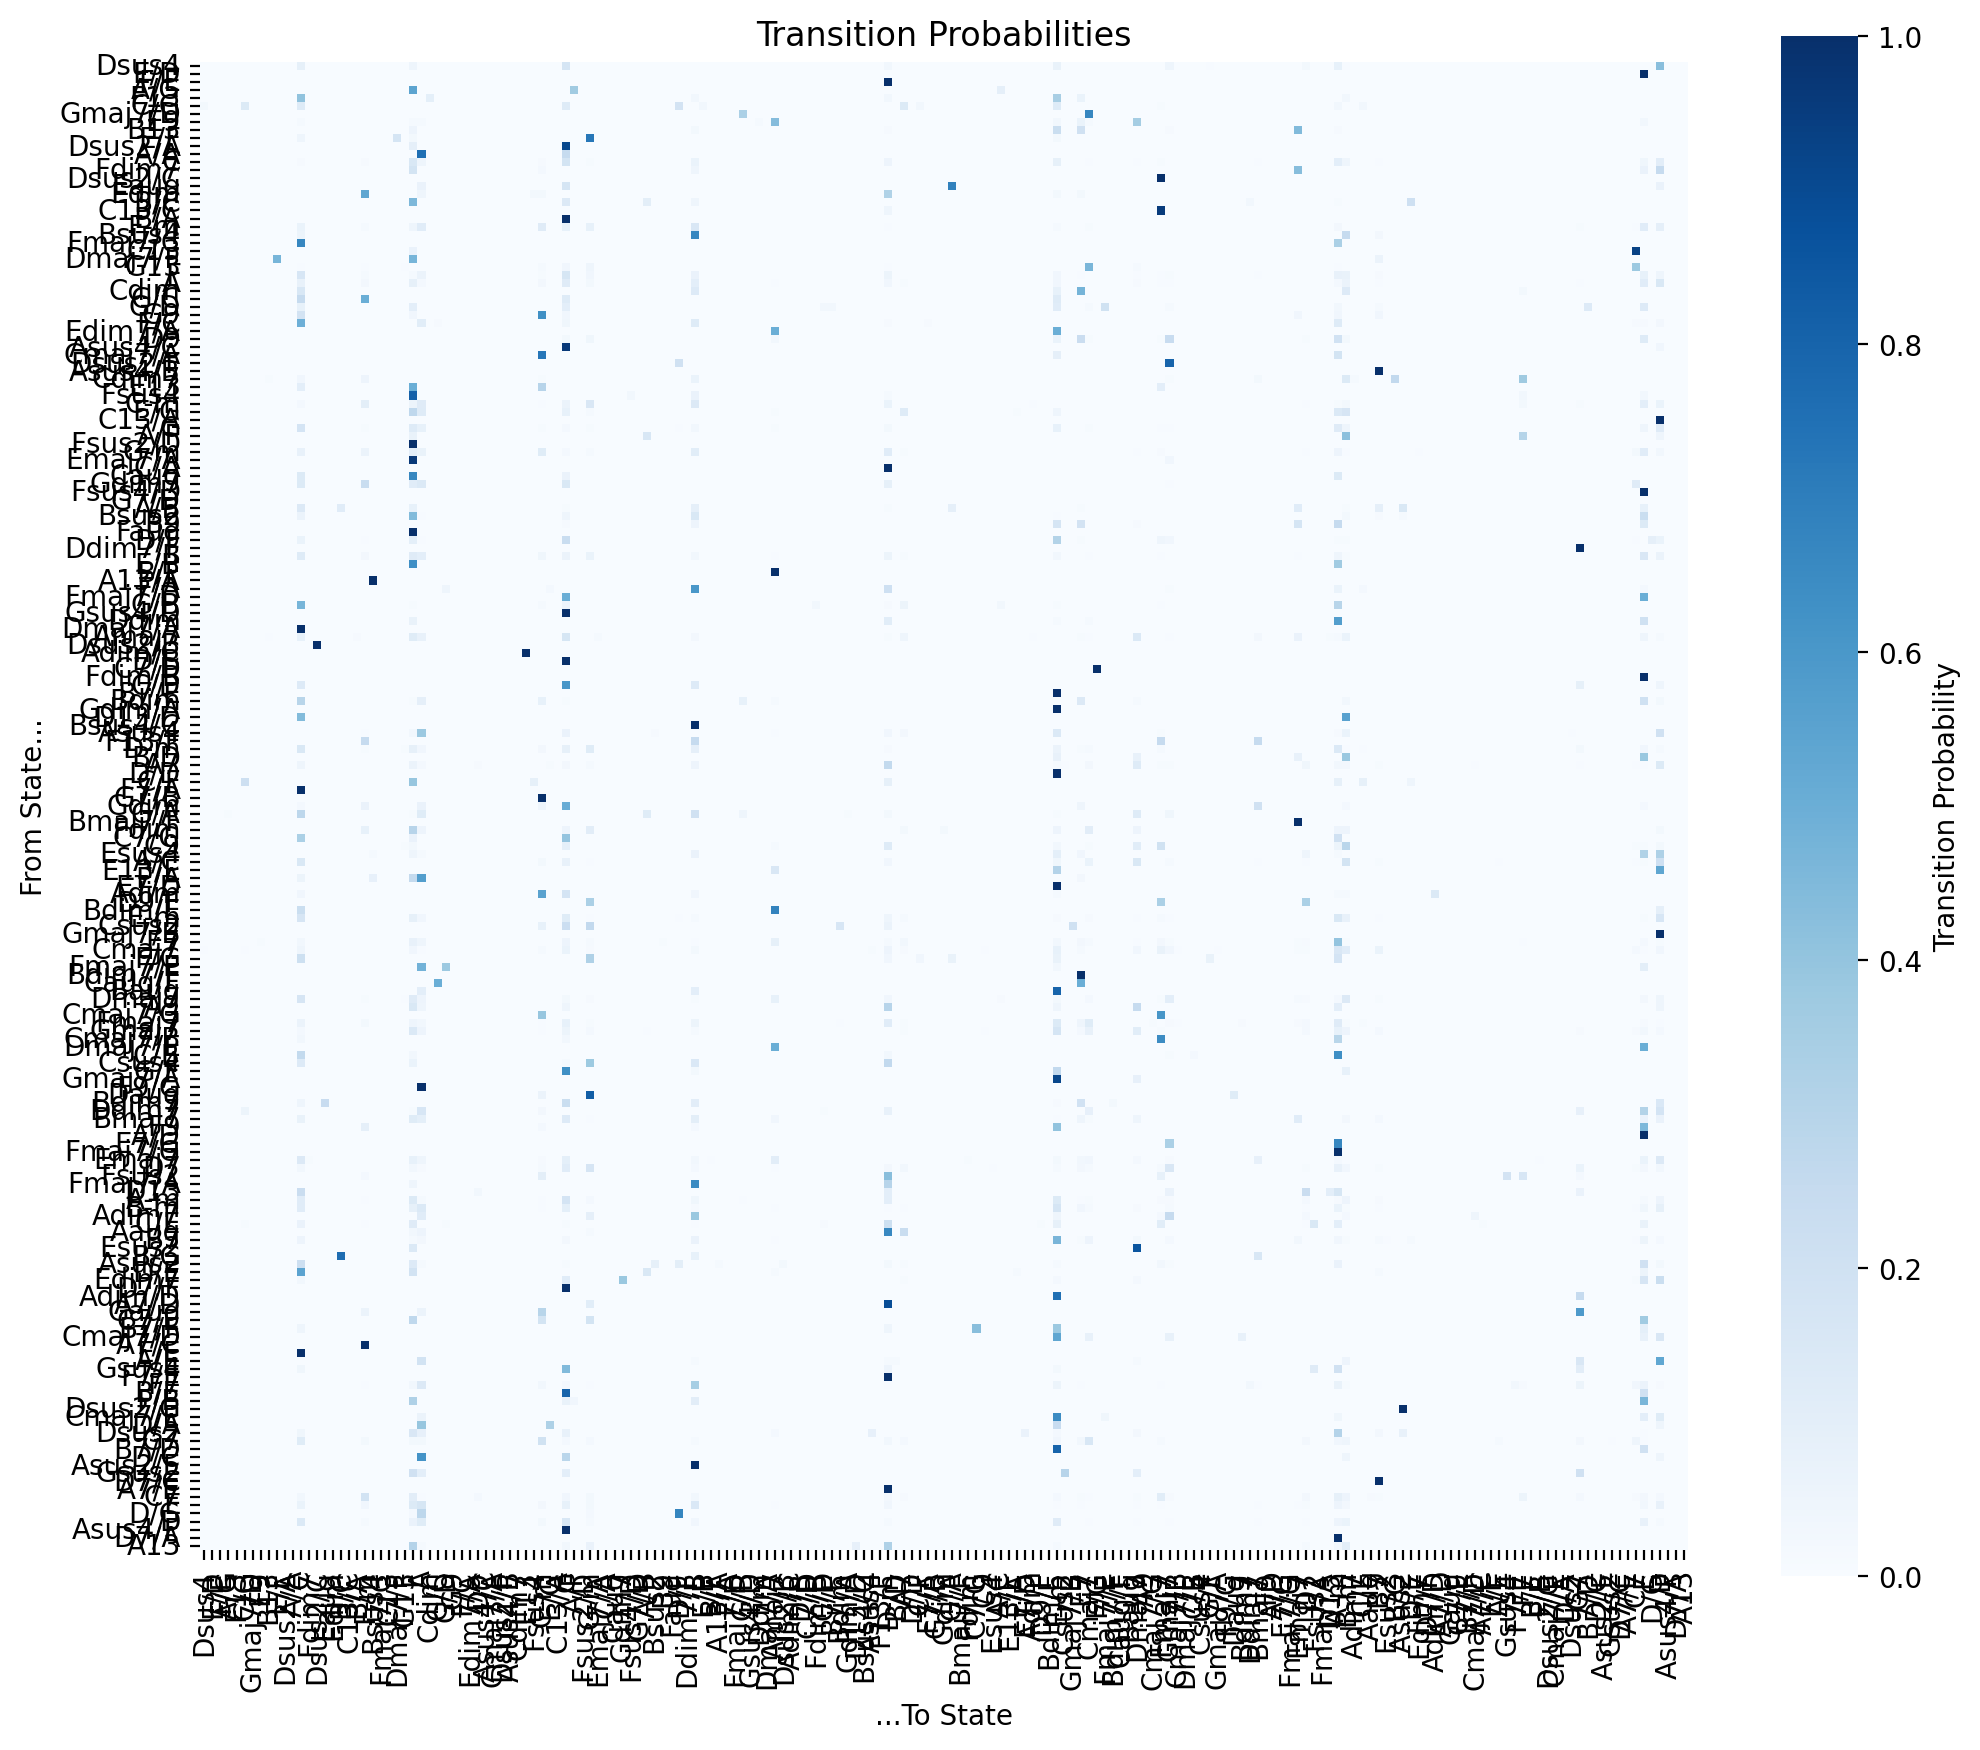

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [61]:
import numpy as np
import music21

# Normalize rows
tr_df = tr_df.div(tr_df.sum(axis=1), axis=0)
n = len(states)

# Add diagonal bump
bump = 0.1
transition = tr_df + np.eye(n) * bump
transition = transition.div(transition.sum(axis=1), axis=0)

# Convex smoothing
λ = 0.2  # adds randomness
uniform = np.ones((n, n)) / n
transition = (1 - λ) * transition + λ * uniform

# Convert to NumPy for easier indexing
transition = transition.values

# Simulate
np.random.seed(555)
initial_state = 'C'
print(f'Initial state: {initial_state}')

n_sim = 20
simulation = [initial_state]

for t in range(n_sim - 1):
    current_idx = states.index(simulation[-1])
    next_idx = np.random.choice(range(n), p=transition[current_idx])
    next_state = states[next_idx]
    simulation.append(next_state)

print(simulation)

# Convert to music
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(3.0)
    stream.append(chord)

stream.write('midi', fp='music.mid')
stream.show('midi')


Initial state: C
['C', 'Fsus2', 'G/D', 'E', 'Dmaj7', 'Dmaj7', 'Eaug', 'D', 'G', 'E-m', 'D-m', 'A', 'C', 'F', 'B-m', 'Cmaj7', 'Fmaj7', 'C', 'B', 'E']


In [68]:
import numpy as np
import music21

# Normalize rows
tr_df = tr_df.div(tr_df.sum(axis=1), axis=0)
n = len(states)

# Add diagonal bump
bump = 0.1
transition = tr_df + np.eye(n) * bump
transition = transition.div(transition.sum(axis=1), axis=0)

# Convex smoothing
λ = 0.2  # adds randomness
uniform = np.ones((n, n)) / n
transition = (1 - λ) * transition + λ * uniform

# Convert to NumPy for easier indexing
transition = transition.values

# Simulate
np.random.seed(893678)
initial_state = 'C'
print(f'Initial state: {initial_state}')

n_sim = 20
simulation = [initial_state]

for t in range(n_sim - 1):
    current_idx = states.index(simulation[-1])
    next_idx = np.random.choice(range(n), p=transition[current_idx])
    next_state = states[next_idx]
    simulation.append(next_state)

print(simulation)

# Convert to music
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(3.0)
    stream.append(chord)

stream.write('midi', fp='music.mid')
stream.show('midi')

Initial state: C
['C', 'F', 'E', 'B-m', 'E-m', 'G-m', 'F', 'E-m', 'F', 'B', 'B', 'F', 'F', 'E', 'A', 'F', 'A', 'A', 'G', 'F']


In [ ]:
import numpy as np
import music21

# Normalize rows
tr_df = tr_df.div(tr_df.sum(axis=1), axis=0)
n = len(states)

# Add diagonal bump
bump = 0.05
transition = tr_df + np.eye(n) * bump
transition = transition.div(transition.sum(axis=1), axis=0)

# Convex smoothing
λ = 0.2  # adds randomness
uniform = np.ones((n, n)) / n
transition = (1 - λ) * transition + λ * uniform

# Convert to NumPy for easier indexing
transition = transition.values

# Simulate
np.random.seed(57126043)
initial_state = 'D-m'
print(f'Initial state: {initial_state}')

n_sim = 20
simulation = [initial_state]

for t in range(n_sim - 1):
    current_idx = states.index(simulation[-1])
    next_idx = np.random.choice(range(n), p=transition[current_idx])
    next_state = states[next_idx]
    simulation.append(next_state)

print(simulation)

# Convert to music
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(4.0)
    stream.append(chord)


stream.write('midi', fp='music.mid')
stream.show('midi')

Initial state: D-m
['D-m', 'A-m', 'C', 'B', 'C', 'A/E', 'D', 'B', 'A', 'D', 'B-m', 'A', 'G-m', 'G-m', 'C', 'E/A', 'A', 'G', 'D', 'C']


In [ ]:
## sounds the least painful

import numpy as np
from music21 import stream, harmony, duration

# Normalize rows
tr_df = tr_df.div(tr_df.sum(axis=1), axis=0)
n = len(states)

# Add diagonal bump
bump = 0.1
transition = tr_df + np.eye(n) * bump
transition = transition.div(transition.sum(axis=1), axis=0)

# Convex smoothing
λ = 0.2  # adds randomness
uniform = np.ones((n, n)) / n
transition = (1 - λ) * transition + λ * uniform

# Convert to NumPy for easier indexing
transition = transition.values

# Simulate
np.random.seed(57126043)
initial_state = 'D-m'
print(f'Initial state: {initial_state}')

n_sim = 20
simulation = [initial_state]

allowed_durations = [1.0, 2.0, 4.0]

for t in range(n_sim - 1):
    current_idx = states.index(simulation[-1])
    next_idx = np.random.choice(range(n), p=transition[current_idx])
    next_state = states[next_idx]
    simulation.append(next_state)

print(simulation)

# Convert to music
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = duration.Duration(np.random.choice(allowed_durations))
    stream.append(chord)


stream.write('midi', fp='music.mid')
stream.show('midi')

Initial state: D-m
['D-m', 'A-m', 'C', 'B', 'C', 'C7/E', 'E', 'B', 'A', 'D', 'B-m', 'A', 'G', 'G', 'C', 'A7', 'Dmaj7', 'G', 'D', 'C']


In [93]:
import numpy as np
from music21 import stream, harmony, duration

# Normalize rows
tr_df = tr_df.div(tr_df.sum(axis=1), axis=0)
n = len(states)

# Add diagonal bump
bump = 0.1
transition = tr_df + np.eye(n) * bump
transition = transition.div(transition.sum(axis=1), axis=0)

# Convex smoothing
λ = 0.2  # adds randomness
uniform = np.ones((n, n)) / n
transition = (1 - λ) * transition + λ * uniform

# Convert to NumPy for easier indexing
transition = transition.values

# Simulate
np.random.seed(5549076)
initial_state = 'Cmaj7'
print(f'Initial state: {initial_state}')

n_sim = 30
simulation = [initial_state]

allowed_durations = [1.0, 1.5, 2.0, 3.0, 4.0]

for t in range(n_sim - 1):
    current_idx = states.index(simulation[-1])
    next_idx = np.random.choice(range(n), p=transition[current_idx])
    next_state = states[next_idx]
    simulation.append(next_state)

print(simulation)

# Convert to music
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = duration.Duration(np.random.choice(allowed_durations))
    stream.append(chord)


stream.write('midi', fp='music.mid')
stream.show('midi')

Initial state: Cmaj7
['Cmaj7', 'B7', 'Gmaj7/B', 'Gmaj7/B', 'Gdim/A', 'E-m', 'E7/G', 'Gmaj7', 'C', 'A/C', 'G', 'A', 'C-m', 'D', 'A', 'F', 'E-m', 'D', 'G', 'G', 'F', 'Gmaj7', 'A/B', 'Asus2', 'Asus4', 'Dmaj7/A', 'C', 'C13/A', 'D', 'G/A']


In [113]:
import numpy as np
from music21 import stream, harmony, duration

# Normalize rows
tr_df = tr_df.div(tr_df.sum(axis=1), axis=0)
n = len(states)

# Add diagonal bump
bump = 0.1
transition = tr_df + np.eye(n) * bump
transition = transition.div(transition.sum(axis=1), axis=0)

# Convex smoothing
λ = 0.2  # adds randomness
uniform = np.ones((n, n)) / n
transition = (1 - λ) * transition + λ * uniform

# Convert to NumPy for easier indexing
transition = transition.values

# Simulate
np.random.seed(50000)
initial_state = 'D-m'
print(f'Initial state: {initial_state}')

n_sim = 25
simulation = [initial_state]

allowed_durations = [0.5, 1.5, 2.0, 3.0, 4.0]

for t in range(n_sim - 1):
    current_idx = states.index(simulation[-1])
    next_idx = np.random.choice(range(n), p=transition[current_idx])
    next_state = states[next_idx]
    simulation.append(next_state)

print(simulation)

# Convert to music
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = duration.Duration(np.random.choice(allowed_durations))
    stream.append(chord)


stream.write('midi', fp='music.mid')
stream.show('midi')

Initial state: D-m
['D-m', 'A-m', 'E-m', 'E-m', 'E-m', 'Esus4', 'E', 'G', 'D', 'D', 'C-m', 'A', 'A', 'E-m', 'Dsus2', 'C7/G', 'E7/G', 'A-m', 'F-m', 'E', 'A', 'A7', 'D', 'G', 'G']
